In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 17.1MB/s 
     |████████████████████████████████| 51kB 7.7MB/s 
     |████████████████████████████████| 1.2MB 55.9MB/s 
     |████████████████████████████████| 194kB 56.1MB/s 
     |████████████████████████████████| 61kB 8.7MB/s 
     |████████████████████████████████| 51kB 8.2MB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 12.8MB 241kB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [2]:
from fastai.vision.all import *

In [3]:
path=Path("/content/gdrive/MyDrive/Training")
path.ls()

(#2) [Path('/content/gdrive/MyDrive/Training/AD'),Path('/content/gdrive/MyDrive/Training/CN')]

In [4]:
item_tfms = Resize(256)
batch_tfms = aug_transforms=[Normalize.from_stats(*imagenet_stats)]

In [5]:
brain = DataBlock(blocks=(ImageBlock,CategoryBlock),
                  get_items= get_image_files,
                  get_y = parent_label,
                  splitter =RandomSplitter(valid_pct= 0.1),
                  item_tfms = item_tfms,
                  batch_tfms = batch_tfms
                  )

In [6]:
dls = brain.dataloaders(path,bs=32)

In [7]:
learn= cnn_learner(dls,vgg16_bn, pretrained=True, metrics=[accuracy,error_rate])

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


SuggestedLRs(lr_min=0.004786301031708717, lr_steep=1.0964781722577754e-06)

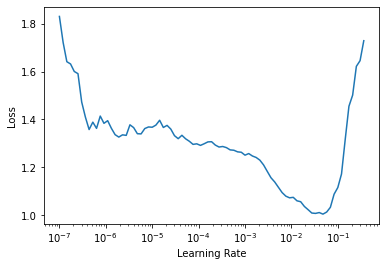

In [8]:
learn.lr_find()

In [10]:
learn.fine_tune(25,1.2e-3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.235034,0.964208,0.475000,0.525000,00:44


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.797861,1.187184,0.400000,0.600000,00:31
1,0.695200,0.977483,0.450000,0.550000,00:31
2,0.590186,0.860185,0.525000,0.475000,00:31
3,0.456370,0.789726,0.625000,0.375000,00:31
4,0.362136,0.780619,0.625000,0.375000,00:31
5,0.288278,0.721453,0.725000,0.275000,00:31
6,0.236534,0.836741,0.725000,0.275000,00:31
7,0.192249,1.005279,0.625000,0.375000,00:31
8,0.159500,0.883580,0.700000,0.300000,00:31
9,0.131998,0.951515,0.725000,0.275000,00:31


In [11]:
learn.unfreeze()

In [12]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.003270,0.934918,0.750000,0.250000,00:30


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.004225,0.973950,0.700000,0.300000,00:31
1,0.025692,1.362585,0.725000,0.275000,00:31
2,0.038808,1.535103,0.750000,0.250000,00:31
3,0.067239,7.348115,0.425000,0.575000,00:31
4,0.130591,1.076148,0.775000,0.225000,00:31
5,0.138707,0.828931,0.800000,0.200000,00:31
6,0.122104,0.779465,0.800000,0.200000,00:31
7,0.106092,0.763969,0.825000,0.175000,00:31
8,0.089890,0.794697,0.850000,0.150000,00:31
9,0.080616,0.794414,0.825000,0.175000,00:31


In [13]:
interp=ClassificationInterpretation.from_learner(learn)

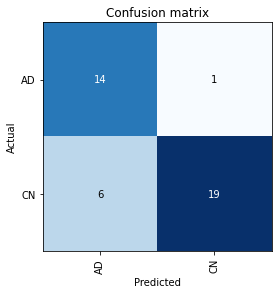

In [14]:
interp.plot_confusion_matrix()

In [15]:
interp.print_classification_report()


              precision    recall  f1-score   support

          AD       0.70      0.93      0.80        15
          CN       0.95      0.76      0.84        25

    accuracy                           0.82        40
   macro avg       0.82      0.85      0.82        40
weighted avg       0.86      0.82      0.83        40



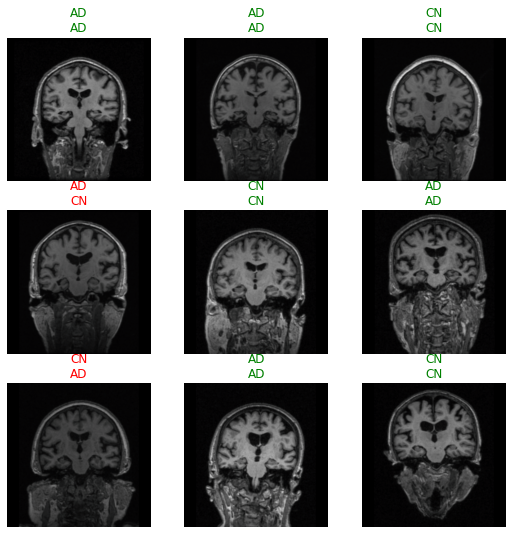

In [16]:
learn.show_results()